___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***) and **Deep Learning algorithms**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [2]:
# !pip install pyforest
# 1-Import Libraies
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno 

from sklearn.compose import make_column_transformer

# Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


# Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# !pip install termcolor
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

import ipywidgets
from ipywidgets import interact

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud 

### Some Useful User Defined Functions

In [3]:
## Some Useful Functions

###############################################################################

def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n', 
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    
        
def multicolinearity_control(df):
    feature =[]
    collinear=[]
    for col in df.corr().columns:
        for i in df.corr().index:
            if (abs(df.corr()[col][i])> .9 and abs(df.corr()[col][i]) < 1):
                    feature.append(col)
                    collinear.append(i)
                    print(colored(f"Multicolinearity alert in between:{col} - {i}", 
                                  "red", attrs=['bold']), df.shape,'\n',
                                  colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    print(colored("Duplicate check...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("Duplicates were dropped!"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')     
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary will drop related columns!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)       
    print('New shape after missing value control:', df.shape)
        
###############################################################################

# To view summary information about the column

def first_look(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [4]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [5]:
df.tail()

Unnamed: 0  Clothing ID  Age  \
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                    Title  \
23481                      Great dress for many occasions   
23482                          Wish it was made of cotton   
23483                               Cute, but see through   
23484  Very cute dress, perfect for summer parties and we   
23485                     Please make more like this one!   

                                                                                                                                                                                                   Review Text  \
23481                                                                      I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.   
23482  It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves.\nnot for me bu...   
23483  This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have...   
23484  I bought this dress for a wedding i have this summer, and it's so cute. unfortunately the fit isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and sh...   
23485                                                                                           This dress in a lovely platinum is feminine and fits perfectly, easy to wear and comfy, too! highly recommend!   

       Rating  Recommended IND  Positive Feedback Count   Division Name  \
23481       5                1                        0  General Petite   
23482       3                1                        0  General Petite   
23483       3                0                        1  General Petite   
23484       3                1                        2         General   
23485       5                1                       22  General Petite   

      Department Name Class Name  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses

In [6]:
df.sample(5)

Unnamed: 0  Clothing ID  Age                        Title  \
1973         1973         1092   36                          NaN   
4754         4754          999   59     Only one problem- length   
12809       12809         1081   45                          NaN   
7917         7917          877   38                 Nice t shirt   
2271         2271          875   34  Versatile, easy to wear top   

                                                                                                                                                                                                   Review Text  \
1973   I adore this dress, the perfect summer dress that you can dress up or down. the color is vibrant and the fabric flows and feels fantastic against your skin. i love that you can still wear a strapl...   
4754   Beautifully made. beautiful drape. deep  blue. so long tho i have to role it up at the waist so nix on tucking a white blouse in. why is it so long???? in 5'6" and got a large. with 2 inch heels i...   
12809                                                                                                                                                                                                      NaN   
7917                                I bought this on sale. the cools on the bird pattern are beautiful and i liked the detail on the sleeves. a little see through, but ok with a nude bra or tank underneath.   
2271                                                                                                       I love the versatility of this top. i feel like i can wear it with anything to dress it up or down.   

       Rating  Recommended IND  Positive Feedback Count   Division Name  \
1973        5                1                       22  General Petite   
4754        3                1                        0         General   
12809       5                1                        0         General   
7917        4                1                        0  General Petite   
2271        4                1                        0         General   

      Department Name Class Name  
1973          Dresses    Dresses  
4754          Bottoms     Skirts  
12809         Dresses    Dresses  
7917             Tops      Knits  
2271             Tops      Knits

### Data Wrangling

In [7]:
first_looking(df)
duplicate_values(df)
drop_columns(df,[])
drop_null(df, 90)

Shape:(23486, 11)
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None
------------------------------------------

In [8]:
df.columns

Index(['unnamed:_0', 'clothing_id', 'age', 'title', 'review_text', 'rating',
       'recommended_ind', 'positive_feedback_count', 'division_name',
       'department_name', 'class_name'],
      dtype='object')

- The "Unnamed:_0" column contains completely unique values and contains the same information as the index. Alsa "clothing_id" columns has unique values over 1200. I'm dropping this columns because they won't work for us as they stand.

In [9]:
df.drop(['unnamed:_0', 'clothing_id'], axis = 1, inplace=True)

In [10]:
df.shape

(23486, 9)

In [11]:
df = df.rename(columns = {'Review Text' : 'text', 'recommended_ind' : 'recommended', 
                          'positive_feedback_count' : 'feedback_count', 'division_name' : 'division', 
                          'department_name' : 'department', 'class_name' :'class'})

In [12]:
df.describe().T

count   mean    std    min    25%    50%    75%     max
age            23486.000 43.199 12.280 18.000 34.000 41.000 52.000  99.000
rating         23486.000  4.196  1.110  1.000  4.000  5.000  5.000   5.000
recommended    23486.000  0.822  0.382  0.000  1.000  1.000  1.000   1.000
feedback_count 23486.000  2.536  5.702  0.000  0.000  1.000  3.000 122.000

- Columns with ordinal information, although the "rating" and "recommended_ind" columns are encoded as numeric. 

In [13]:
df.describe(include=object).T

count unique  \
title        19676  13993   
review_text  22641  22634   
division     23472      3   
department   23472      6   
class        23472     20   

                                                                                            top  \
title                                                                                  Love it!   
review_text  Perfect fit and i've gotten so many compliments. i buy all my suits from here now!   
division                                                                                General   
department                                                                                 Tops   
class                                                                                   Dresses   

              freq  
title          136  
review_text      3  
division     13850  
department   10468  
class         6319

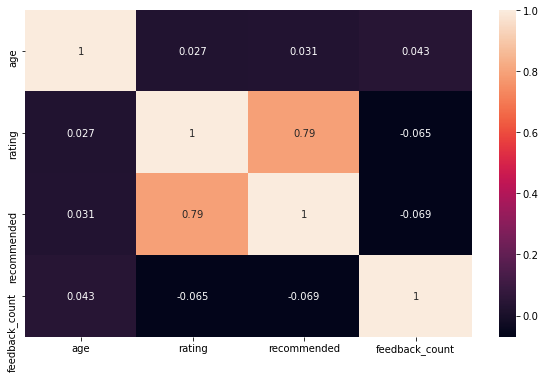

In [14]:
sns.heatmap(df.corr(), annot=True);

- Let us have look at the columns remaining in the dataset.

In [15]:
df.columns

Index(['age', 'title', 'review_text', 'rating', 'recommended',
       'feedback_count', 'division', 'department', 'class'],
      dtype='object')

***age***
- Positive Integer variable of the reviewers age.

In [16]:
first_look("age")

column name    :  age
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  77
39    1269
35     909
36     842
34     804
38     780
37     766
41     741
33     725
46     713
42     651
32     631
48     626
44     617
40     617
43     579
31     569
47     564
53     560
45     529
29     513
49     490
56     471
52     442
28     428
26     423
30     407
50     398
54     395
51     393
57     363
27     344
60     341
62     338
25     331
55     328
59     321
58     277
66     276
64     247
23     247
24     245
63     239
61     227
65     226
67     157
22     146
68     141
69     113
20     108
21     102
70      93
71      51
74      50
72      46
83      43
73      40
19      40
75      26
77      18
78      15
79      15
82      13
76      10
80      10
85       6
84       6
91       5
89       5
81       5
18       4
87       4
94       3
90       2
86       2
93       2
99       2
92       1
Name: age, dtype: int64


In [17]:
df.age.describe().T

count   23486.000
mean       43.199
std        12.280
min        18.000
25%        34.000
50%        41.000
75%        52.000
max        99.000
Name: age, dtype: float64

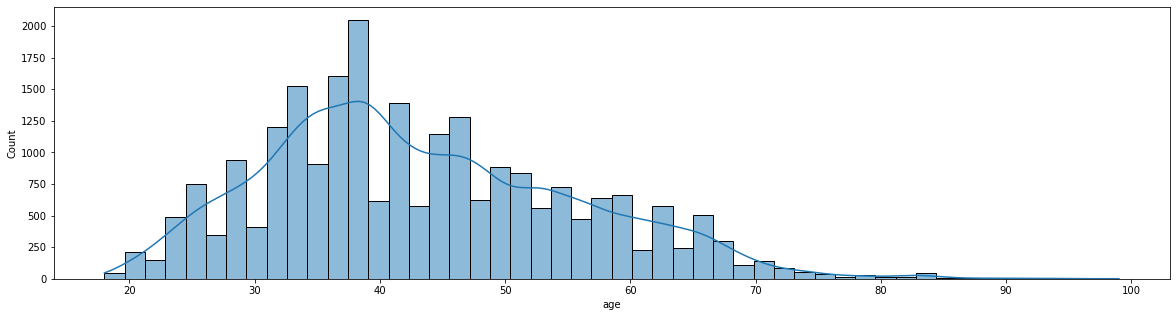

In [18]:
plt.figure(figsize = (20,5))
sns.histplot(df, x='age', kde = True, bins = 50);

***rating*** 
- Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

In [19]:
first_look("rating")

column name    :  rating
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5
5    13131
4     5077
3     2871
2     1565
1      842
Name: rating, dtype: int64


In [20]:
df.rating.describe().T

count   23486.000
mean        4.196
std         1.110
min         1.000
25%         4.000
50%         5.000
75%         5.000
max         5.000
Name: rating, dtype: float64

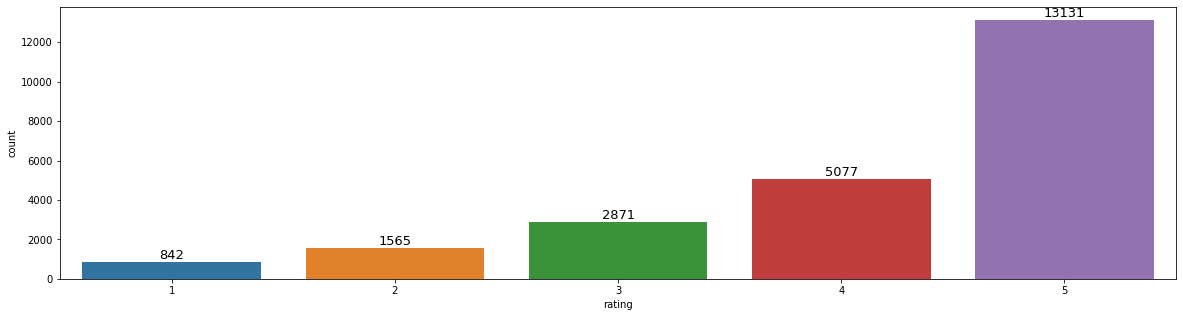

In [21]:
plt.figure(figsize = (20,5))
sns.countplot(x = df.rating, data = df)
for index,value in enumerate(df.rating.value_counts().sort_values()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13);

5    13131
4     5077
3     2871
2     1565
1      842
Name: rating, dtype: int64


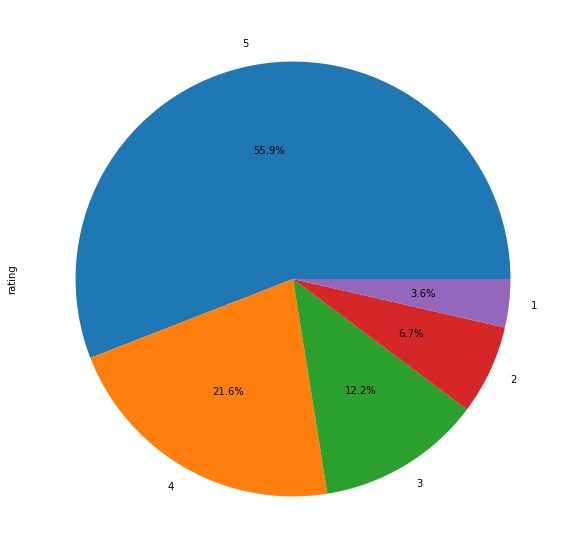

In [22]:
print(df["rating"].value_counts())
df["rating"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

***recommended*** 
- Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

In [23]:
first_look("recommended")

column name    :  recommended
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
1    19314
0     4172
Name: recommended, dtype: int64


In [24]:
df.recommended.describe().T

count   23486.000
mean        0.822
std         0.382
min         0.000
25%         1.000
50%         1.000
75%         1.000
max         1.000
Name: recommended, dtype: float64

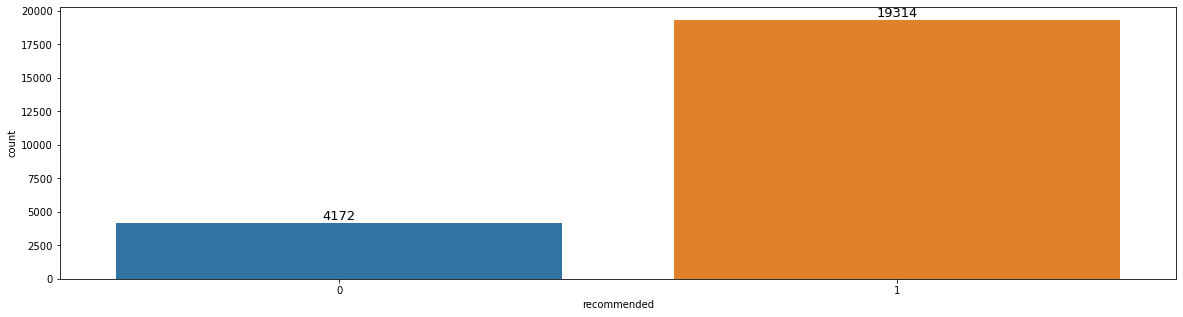

In [25]:
plt.figure(figsize = (20,5))
sns.countplot(x = df.recommended, data = df)
for index,value in enumerate(df.recommended.value_counts().sort_values()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13);

1    19314
0     4172
Name: recommended, dtype: int64


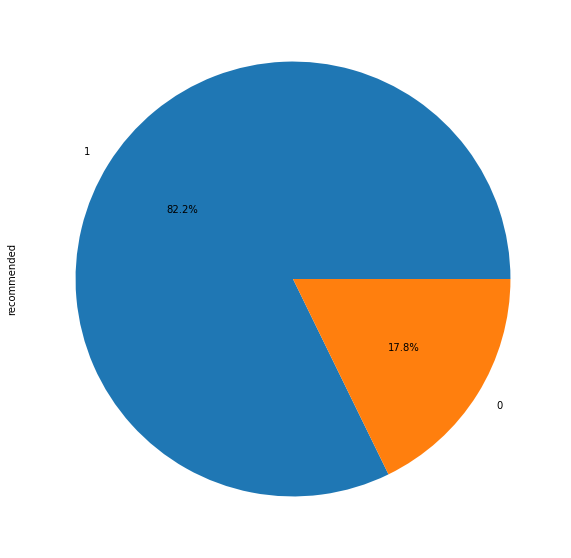

In [26]:
print(df["recommended"].value_counts())
df["recommended"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

***feedback_count:***
- Positive Integer documenting the number of other customers who found this review positive.

In [27]:
first_look("feedback_count")

column name    :  feedback_count
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  82
0      11176
1       4043
2       2193
3       1433
4        922
5        673
6        525
7        374
8        319
9        261
10       225
11       178
12       146
14       121
13       102
15        94
17        81
16        74
18        62
19        54
20        40
23        31
21        30
22        29
25        25
28        24
26        23
24        21
27        20
30        18
31        17
29        15
32        10
42         9
37         9
38         8
34         7
36         6
35         6
33         6
51         5
43         4
45         4
39         4
81         4
65         4
44         3
40         3
47         3
41         3
57         3
46         2
49         2
58         2
53         2
55         2
66         1
78         1
94         1
64         1
48         1
93         1
77         1
61         1
50         1
87         1
98         

In [28]:
df.feedback_count.describe().T

count   23486.000
mean        2.536
std         5.702
min         0.000
25%         0.000
50%         1.000
75%         3.000
max       122.000
Name: feedback_count, dtype: float64

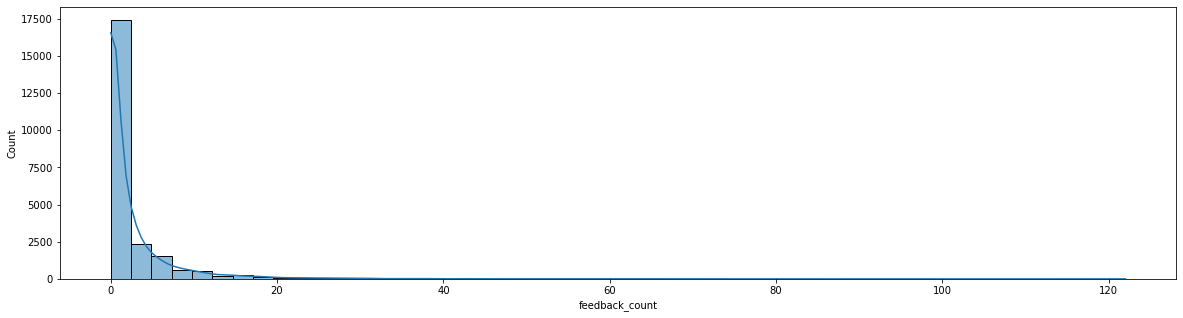

In [29]:
plt.figure(figsize = (20,5))
sns.histplot(df, x='feedback_count', kde = True, bins = 50);

***division*** 
- Categorical name of the product high level division.

In [30]:
first_look("division")

column name    :  division
--------------------------------
per_of_nulls   :  % 0.06
num_of_nulls   :  14
num_of_uniques :  3
General           13850
General Petite     8120
Initmates          1502
NaN                  14
Name: division, dtype: int64


In [31]:
df.division.describe().T

count       23472
unique          3
top       General
freq        13850
Name: division, dtype: object

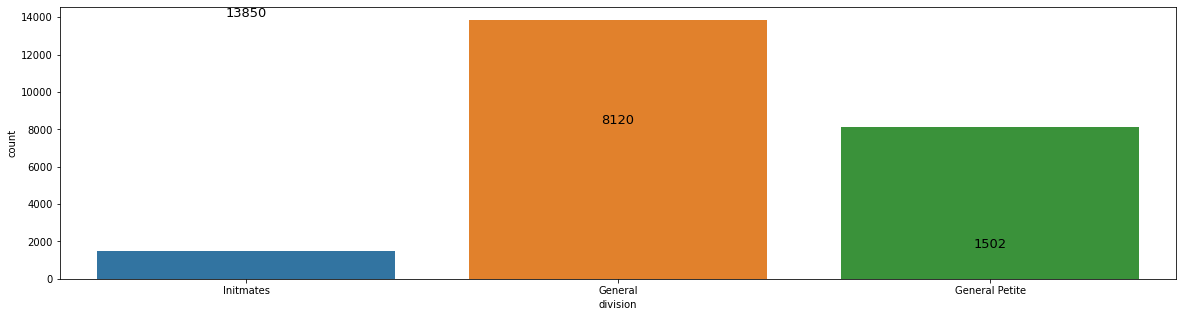

In [32]:
plt.figure(figsize = (20,5))
sns.countplot(x = df.division, data = df)
for index,value in enumerate(df.division.value_counts()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13);

General           13850
General Petite     8120
Initmates          1502
Name: division, dtype: int64


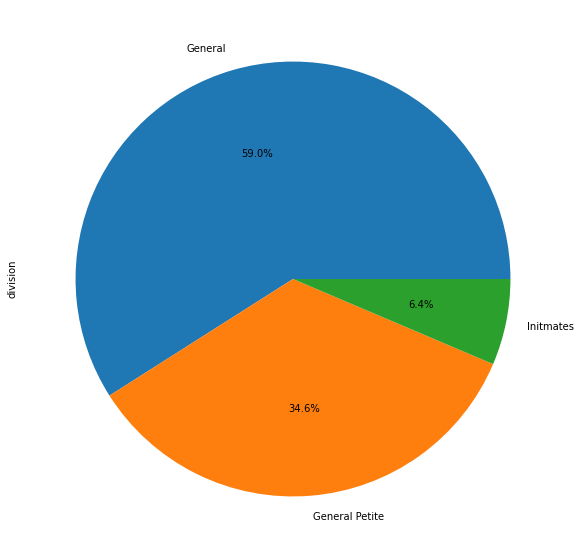

In [33]:
print(df["division"].value_counts())
df["division"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

***department***
- Categorical name of the product department name

In [34]:
first_look("department")

column name    :  department
--------------------------------
per_of_nulls   :  % 0.06
num_of_nulls   :  14
num_of_uniques :  6
Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
NaN            14
Name: department, dtype: int64


In [35]:
df["department"].describe().T

count     23472
unique        6
top        Tops
freq      10468
Name: department, dtype: object

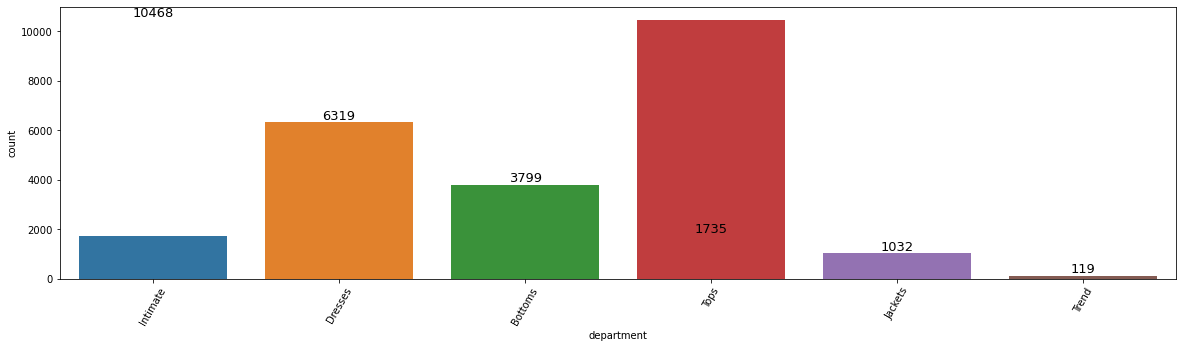

In [36]:
plt.figure(figsize = (20,5))
sns.countplot(x = df["department"], data = df)
plt.xticks(rotation=60)
for index,value in enumerate(df["department"].value_counts()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13);

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: department, dtype: int64


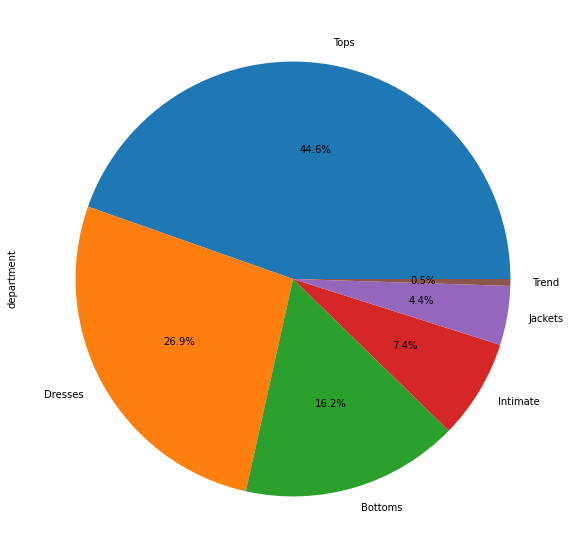

In [37]:
print(df["department"].value_counts())
df["department"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

***class***
- Categorical name of the product class name.

In [38]:
first_look("class")

column name    :  class
--------------------------------
per_of_nulls   :  % 0.06
num_of_nulls   :  14
num_of_uniques :  20
Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
NaN                 14
Casual bottoms       2
Chemises             1
Name: class, dtype: int64


In [39]:
df["class"].describe().T

count       23472
unique         20
top       Dresses
freq         6319
Name: class, dtype: object

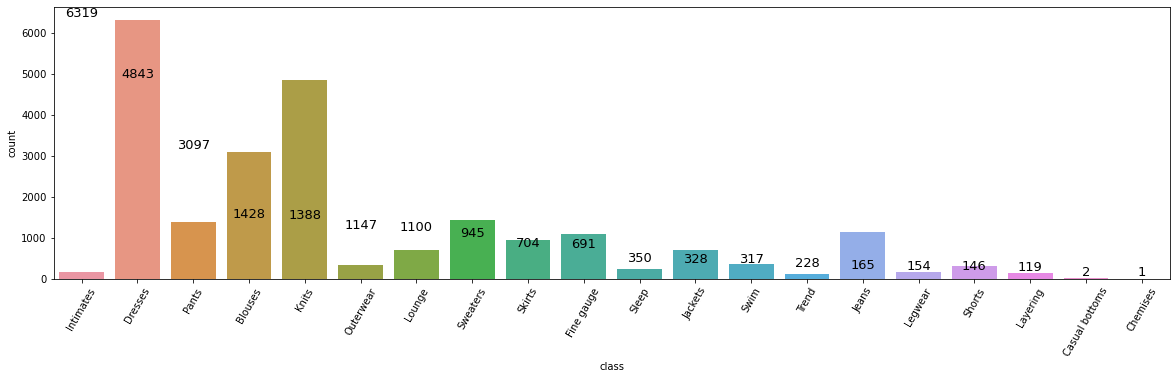

In [40]:
plt.figure(figsize = (20,5))
sns.countplot(x = df["class"], data = df)
plt.xticks(rotation=60)
for index,value in enumerate(df["class"].value_counts()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13);

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: class, dtype: int64


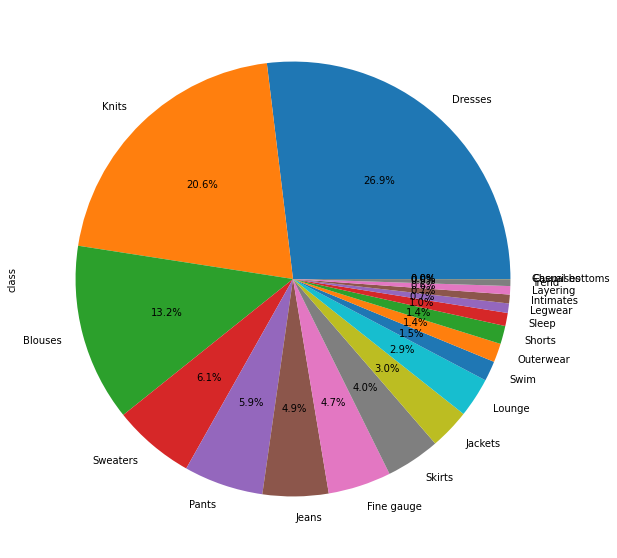

In [41]:
print(df["class"].value_counts())
df["class"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

***title*** 
- String variable for the title of the review.

In [42]:
first_look("title")

column name    :  title
--------------------------------
per_of_nulls   :  % 16.22
num_of_nulls   :  3810
num_of_uniques :  13993
NaN                                    3810
Love it!                                136
Beautiful                                95
Love                                     88
Love!                                    84
                                       ... 
Best ag jeans yet                         1
My go-to top!                             1
Great tee for summer                      1
Great pants that go with everything       1
Fun fur!                                  1
Name: title, Length: 13994, dtype: int64


In [43]:
df.title.describe().T

count        19676
unique       13993
top       Love it!
freq           136
Name: title, dtype: object

***review_text*** 
- String variable for the review body.

In [44]:
first_look("review_text")

column name    :  review_text
--------------------------------
per_of_nulls   :  % 3.6
num_of_nulls   :  845
num_of_uniques :  22634
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       845
Perfect fit and i've gotten so many compliments. i buy all my suits from here now!                                                                                                                                                                                                                                                                                   

In [45]:
df.review_text.describe().T

count                                                                                  22641
unique                                                                                 22634
top       Perfect fit and i've gotten so many compliments. i buy all my suits from here now!
freq                                                                                       3
Name: review_text, dtype: object

#### Check Proportion of Target Class Variable:

In [46]:
df.columns

Index(['age', 'title', 'review_text', 'rating', 'recommended',
       'feedback_count', 'division', 'department', 'class'],
      dtype='object')

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

1    19314
0     4172
Name: recommended, dtype: int64


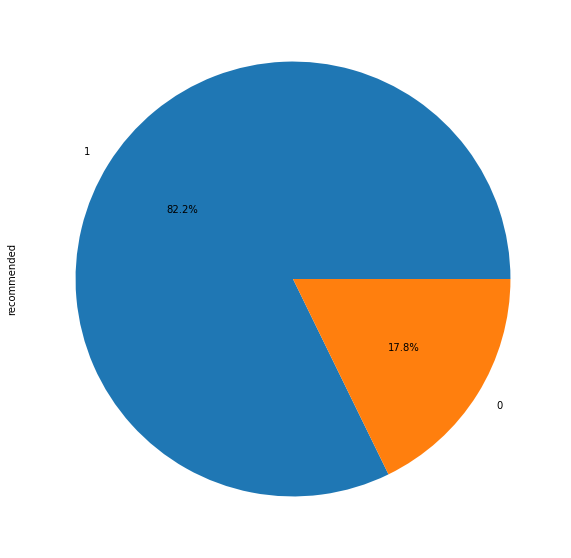

In [47]:
# recommended : 
# Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

print(df["recommended"].value_counts())
df["recommended"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

5    13131
4     5077
3     2871
2     1565
1      842
Name: rating, dtype: int64


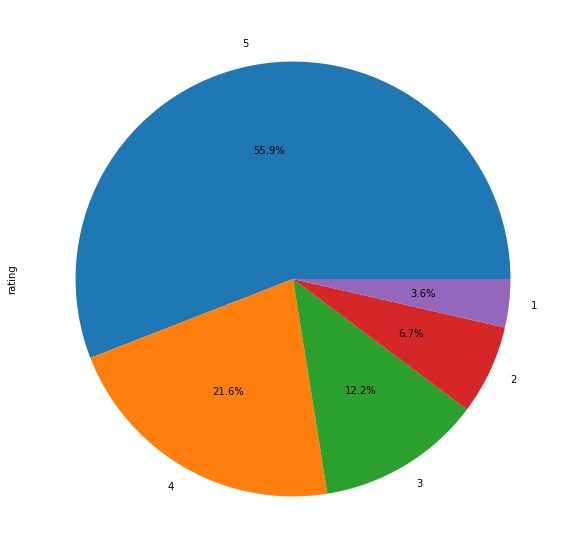

In [48]:
# Rating : 
# Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

print(df["rating"].value_counts())
df["rating"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [49]:
df.columns

Index(['age', 'title', 'review_text', 'rating', 'recommended',
       'feedback_count', 'division', 'department', 'class'],
      dtype='object')

In [50]:
df_1 = df.copy()

# df_1 = df[['review_text', 'recommended']].copy()

In [51]:
drop_columns = ['age', 
                'title', 
                'rating',
                'feedback_count', 
                'division',
                'department',
                'class']

In [52]:
df_1.drop(drop_columns, axis = 1, inplace = True)

In [53]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_text  22641 non-null  object
 1   recommended  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [54]:
df_1.rename(columns = {'review_text':'text', 'recommended':'recommend'}, inplace = True)

In [55]:
df_1.columns

Index(['text', 'recommend'], dtype='object')

In [56]:
# df_1['recommend'].value_counts(dropna = False)

In [57]:
# df_1['recommend'] = df_1['recommend'].replace([0,1],['negative','positive'])

In [58]:
# df_1['recommend'].value_counts(dropna = False)

---
---


### Missing Value Detection

In [59]:
missing_values(df_1)

Missing_Number  Missing_Percent
text             845            0.036

In [60]:
df_1.isnull().melt(value_name="missing")

variable  missing
0           text    False
1           text    False
2           text    False
3           text    False
4           text    False
...          ...      ...
46967  recommend    False
46968  recommend    False
46969  recommend    False
46970  recommend    False
46971  recommend    False

[46972 rows x 2 columns]

<Figure size 720x360 with 0 Axes>

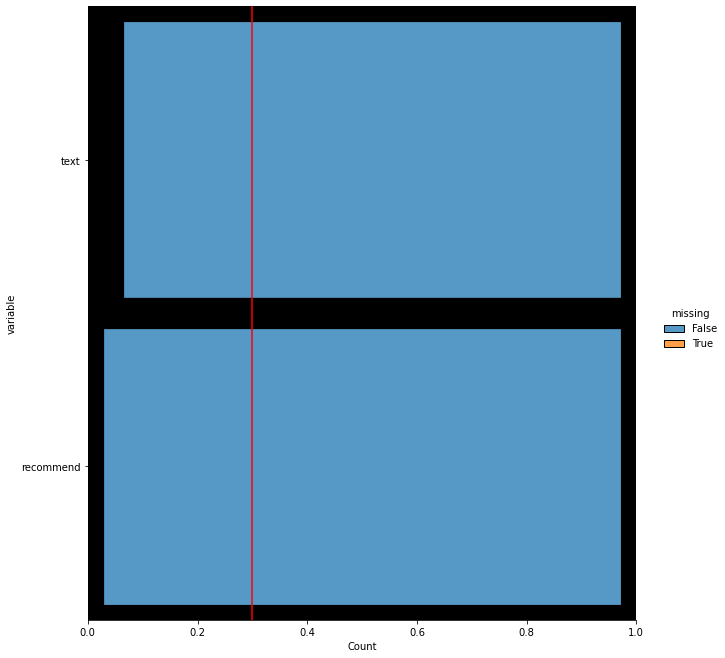

In [61]:
plt.figure(figsize = (10, 5))

sns.displot(
    data = df_1.isnull().melt(value_name = "missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    height = 9.25)

plt.axvline(0.3, color = "r");

In [62]:
df_1 = df_1.dropna()

# df_1 = df_1.dropna(subset=['text'], axis=0)
# df_1 = df_1.reset_index(drop=True)

In [63]:
missing_values(df_1)

Empty DataFrame
Columns: [Missing_Number, Missing_Percent]
Index: []

In [64]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       22641 non-null  object
 1   recommend  22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


In [65]:
df_1["text"].str.isspace().sum()
df_1[df_1["text"].str.isspace() == True].index

Int64Index([], dtype='int64')

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [66]:
df_1.head()

text  \
0                                                                                                                                                    Absolutely wonderful - silky and sexy and comfortable   
1  Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length...   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...   
3                                                                             I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4         This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   recommend  
0          1  
1          1  
2          0  
3          1  
4          1

In [67]:
stop_words = stopwords.words('english')

In [68]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower()) 
        
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]  
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]  # stopword lerden temizleme
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
        
    #joining
    return " ".join(text_cleaned)

In [69]:
df_1["text"] = df_1["text"].apply(cleaning)
df_1["text"].head()

0                                                                                                                                                                absolutely wonderful silky sexy comfortable
1                       love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2    high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom ha...
3                                                                                                                   love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4                                                                                             shirt flattering due adjustable front tie perfect length wear legging sleeveless pair 

### Rare Words

In [70]:
" ".join(df_1["text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 's

In [71]:
rare_words = pd.Series(" ".join(df_1["text"]).split()).value_counts()
rare_words

dress         11352
fit           10128
size           9363
love           8992
top            8281
              ...  
stumpified        1
sweetens          1
slightl           1
yello             1
embrodiery        1
Length: 11996, dtype: int64

In [72]:
rare_words = rare_words[rare_words <= 2] 

In [73]:
rare_words.index

Index(['worsened', 'cosy', 'compliements', 'japanese', 'fails', 'squash',
       'cou', 'transforms', 'assessing', 'fairisle',
       ...
       'hurdle', 'planted', 'alllll', 'girlish', 'draft', 'stumpified',
       'sweetens', 'slightl', 'yello', 'embrodiery'],
      dtype='object', length=6497)

In [74]:
df_1["text"] = df_1["text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df_1["text"].head()

0                                                                                                                                                                absolutely wonderful silky sexy comfortable
1                       love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2    high hope dress really wanted work initially ordered petite small usual size found small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight laye...
3                                                                                                                   love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4                                                                                             shirt flattering due adjustable front tie perfect length wear legging sleeveless pair 

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [75]:
df_1[df_1["recommend"] == 0].head()

text  \
2   high hope dress really wanted work initially ordered petite small usual size found small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight laye...   
5   love tracy reese dress one petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening skirt would take away embellish...   
10       dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back   
22  first pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath look like described sa...   
25            loved material didnt really look long dress purchased large medium im atleast material foot gap front much wider look felt like dress fell flat returned im usually large med fit better jean   

    recommend  
2           0  
5           0  
10          0  
22          0  
25          0

In [76]:
df_1[df_1["recommend"] == 1].head()

text  \
0                                                                                                                                                              absolutely wonderful silky sexy comfortable   
1                     love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite   
3                                                                                                                 love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment   
4                                                                                           shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt   
6  basket hte last see would look like person store pick went teh color pale hte color really gorgeous turn trying little baggy hte x hte size bummer petite decided though said everything pant skirt ...   

   recommend  
0          1  
1          1  
3          1  
4          1  
6          1

### Collect Words (positive and negative separately)

In [77]:
" ".join(df_1["text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flatteri

In [78]:
positive_words =" ".join(df_1[df_1["recommend"] == 1].text).split()
positive_words

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'basket',
 'hte',
 'last',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turn',
 'trying',
 'little',
 'baggy',
 'hte',
 'x',
 'hte',
 'size',
 'bummer',
 'petite',
 'decided',
 'though',
 'said',
 'everything',
 '

In [79]:
negative_words = " ".join(df_1[df_1["recommend"] == 0].text).split()
negative_words 

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'stranger',
 'alteration',
 'shortening',
 'skirt',
 'would',
 'take',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'work',
 'returned',
 'dress',
 'dress',
 'run',
 'small',
 'esp',
 'zipper',
 'area',
 'run',
 'ordered',
 'sp',
 'typically',
 'fit',
 'tight',
 'material',

In [80]:
len(positive_words)

516816

In [81]:
len(negative_words)

116488

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [82]:
review_text = df_1["text"]

In [83]:
all_words = " ".join(review_text)

In [84]:
all_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

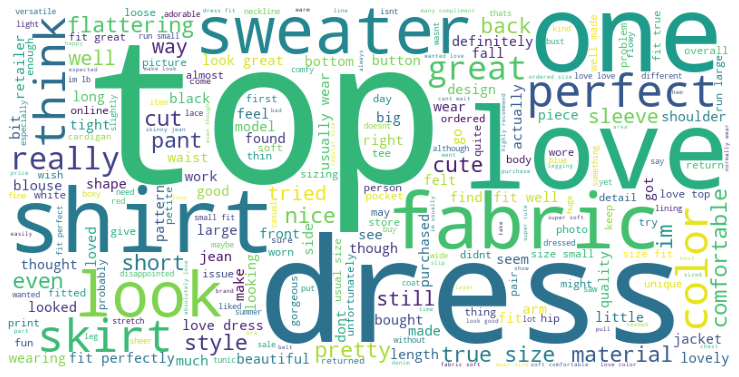

In [85]:
wordcloud = WordCloud(width=800,height=400,background_color="white", max_words =250).generate(all_words)

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

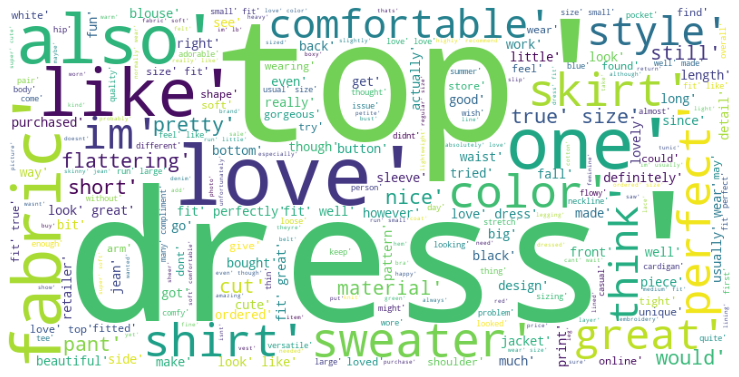

In [86]:
wordcloud = WordCloud(width=800,height=400,background_color="white", max_words =250).generate(str(positive_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

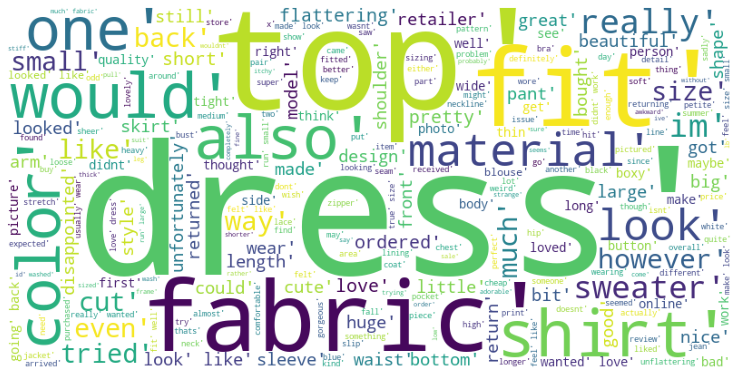

In [87]:
wordcloud = WordCloud(width=800,height=400,background_color="white", max_words =250).generate(str(negative_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Counting words

In [88]:
counter_all = Counter(word_tokenize(all_words))
counter_all.most_common(50)

[('dress', 11352),
 ('fit', 10128),
 ('size', 9363),
 ('love', 8992),
 ('top', 8281),
 ('like', 7036),
 ('color', 6916),
 ('look', 6891),
 ('wear', 6521),
 ('great', 6101),
 ('im', 5968),
 ('would', 5014),
 ('fabric', 4862),
 ('small', 4589),
 ('really', 3924),
 ('ordered', 3835),
 ('little', 3773),
 ('perfect', 3760),
 ('one', 3704),
 ('flattering', 3485),
 ('soft', 3322),
 ('well', 3251),
 ('back', 3186),
 ('comfortable', 3047),
 ('cute', 3030),
 ('nice', 3017),
 ('bought', 2986),
 ('beautiful', 2950),
 ('bit', 2877),
 ('material', 2811),
 ('shirt', 2791),
 ('large', 2791),
 ('much', 2703),
 ('sweater', 2700),
 ('length', 2638),
 ('run', 2631),
 ('jean', 2600),
 ('also', 2583),
 ('work', 2527),
 ('petite', 2430),
 ('got', 2426),
 ('long', 2400),
 ('short', 2361),
 ('waist', 2306),
 ('quality', 2259),
 ('medium', 2233),
 ('skirt', 2220),
 ('think', 2194),
 ('pretty', 2188),
 ('even', 2166)]

## 5. Sentiment Classification with Machine Learning and Deep Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [89]:
X = df_1["text"]
y = df_1["recommend"]

In [90]:
y = y.map({0:1, 1:0})

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

# veri dengesiz-imbalanced olduğu için stratify kullanıldı.

<IPython.core.display.Javascript object>

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [92]:
from sklearn.feature_extraction.text import CountVectorizer

In [93]:
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [94]:
X_train_count

<18112x5468 sparse matrix of type '<class 'numpy.int64'>'
	with 459355 stored elements in Compressed Sparse Row format>

In [95]:
X_test_count

<4529x5468 sparse matrix of type '<class 'numpy.int64'>'
	with 114130 stored elements in Compressed Sparse Row format>

In [96]:
len(X_train_count.toarray())

18112

In [97]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [98]:
len(X_test_count.toarray())

4529

In [99]:
X_test_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [100]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

aa  ab  abby  abdomen  ability  able  abo  absolute  absolutely  \
0       0   0     0        0        0     0    0         0           0   
1       0   0     0        0        0     0    0         0           0   
2       0   0     0        0        0     0    0         0           0   
3       0   0     0        0        0     0    0         0           1   
4       0   0     0        0        0     0    0         0           0   
...    ..  ..   ...      ...      ...   ...  ...       ...         ...   
18107   0   0     0        0        0     0    0         0           0   
18108   0   0     0        0        0     0    0         0           0   
18109   0   0     0        0        0     0    0         0           0   
18110   0   0     0        0        0     0    0         0           1   
18111   0   0     0        0        0     0    0         0           0   

       absolutley  abstract  absurd  abt  abundance  ac  accent  accented  \
0               0         0       0    0          0   0       0         0   
1               0         0       0    0          0   0       0         0   
2               0         0       0    0          0   0       0         0   
3               0         0       0    0          0   0       0         0   
4               0         0       0    0          0   0       0         0   
...           ...       ...     ...  ...        ...  ..     ...       ...   
18107           0         0       0    0          0   0       0         0   
18108           0         0       0    0          0   0       0         0   
18109           0         0       0    0          0   0       0         0   
18110           0         0       0    0          0   0       0         0   
18111           0         0       0    0          0   0       0         0   

       accentuate  accentuated  accentuates  accentuating  accept  acceptable  \
0               0            0            0             0       0           0   
1               0            0            0             0       0           0   
2               0            0            0             0       0           0   
3               0            0            0             0       0           0   
4               0            0            0             0       0           0   
...           ...          ...          ...           ...     ...         ...   
18107           0            0            0             0       0           0   
18108           0            0            0             0       0           0   
18109           0            0            0             0       0           0   
18110           0            0            0             0       0           0   
18111           0            0            0             0       0           0   

       access  accessorize  accessorized  accessorizing  accessory  accident  \
0           0            0             0              0          0         0   
1           0            0             0              0          0         0   
2           0            0             0              0          0         0   
3           0            0             0              0          0         0   
4           0            0             0              0          0         0   
...       ...          ...           ...            ...        ...       ...   
18107       0            0             0              0          0         0   
18108       0            0             0              0          0         0   
18109       0            0             0              0          0         0   
18110       0            0             0              0          0         0   
18111       0            0             0              0          0         0   

       accidental  accidentally  accommodate  accommodates  accommodating  \
0               0             0            0             0              0   
1               0             0            0             0              0   
2               0           

In [101]:
X_train

21794                                         love gorgeous shade unflattering skintone make look version tied dress holding horse come fantastic fit flattering tummy rib cage size generous curve give regular
5559     found store last weekend thought perfect got size small plenty space usually small long found knee length zoom see detail work along front edge complement pretty back pocket btw worn everything su...
5968     negative thing say color person different much coral pink pink fine tad unexpected ordered size fit perfectly chest laser cut out yoke add nice feminine unique touch otherwise basic top cant wait ...
21919                         absolutely love top especially fl weather soft fall tad longer back little fitted bust area look tank well love satin trim say run little smaller tank bc x tank needed small love
14280                      following advice review ordered size larger normal since review said run small bust dress ended much big everywhere including bust dress 

### TF-IDF

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [103]:
tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [104]:
X_train_tf_idf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.29292217],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [105]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

aa    ab  abby  abdomen  ability  able   abo  absolute  absolutely  \
0     0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
1     0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
2     0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
3     0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.154   
4     0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
...     ...   ...   ...      ...      ...   ...   ...       ...         ...   
18107 0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
18108 0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
18109 0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
18110 0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.324   
18111 0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   

       absolutley  abstract  absurd   abt  abundance    ac  accent  accented  \
0           0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
1           0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
2           0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
3           0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
4           0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
...           ...       ...     ...   ...        ...   ...     ...       ...   
18107       0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
18108       0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
18109       0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
18110       0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
18111       0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   

       accentuate  accentuated  accentuates  accentuating  accept  acceptable  \
0           0.000        0.000        0.000         0.000   0.000       0.000   
1           0.000        0.000        0.000         0.000   0.000       0.000   
2           0.000        0.000        0.000         0.000   0.000       0.000   
3           0.000        0.000        0.000         0.000   0.000       0.000   
4           0.000        0.000        0.000         0.000   0.000       0.000   
...           ...          ...          ...           ...     ...         ...   
18107       0.000        0.000        0.000         0.000   0.000       0.000   
18108       0.000        0.000        0.000         0.000   0.000       0.000   
18109       0.000        0.000        0.000         0.000   0.000       0.000   
18110       0.000        0.000        0.000         0.000   0.000       0.000   
18111       0.000        0.000        0.000         0.000   0.000       0.000   

       access  accessorize  accessorized  accessorizing  accessory  accident  \
0       0.000        0.000         0.000          0.000      0.000     0.000   
1       0.000        0.000         0.000          0.000      0.000     0.000   
2       0.000        0.000         0.000          0.000      0.000     0.000   
3       0.000        0.000         0.000          0.000      0.000     0.000   
4       0.000        0.000         0.000          0.000      0.000     0.000   
...       ...          ...           ...            ...        ...       ...   
18107   0.000        0.000         0.000          0.000      0.000     0.000   
18108   0.000        0.000         0.000          0.000      0.000     0.000   
18109   0.000        0.000         0.000          0.000      0.000     0.000   
18110   0.000        0.000         0.000          0.000      0.000     0.000   
18111   0.000        0.000         0.000          0.000      0.000     0.000   

       accidental  accidentally  accommodate  accommodates  accommodating  \
0           0.000         0.000        0.000         0.000          0.000   
1          

## Model Comparisons_ML Modelling

In [106]:
from sklearn.metrics import plot_confusion_matrix,classification_report, f1_score, recall_score

In [107]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    plot_confusion_matrix(model,X_test, y_test)

## Logistic Regression

### CountVectorizer

In [108]:
from sklearn.linear_model import LogisticRegression

# log = LogisticRegression(C = 0.18, max_iter=100, class_weight='balanced', random_state = 101)
# log.fit(X_train_count,y_train)

log = LogisticRegression(class_weight='balanced', random_state = 101)
log.fit(X_train_count,y_train)

LogisticRegression(class_weight='balanced', random_state=101)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3709
           1       0.60      0.81      0.69       820

    accuracy                           0.87      4529
   macro avg       0.78      0.85      0.80      4529
weighted avg       0.89      0.87      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     14831
           1       0.74      0.97      0.84      3281

    accuracy                           0.93     18112
   macro avg       0.87      0.95      0.90     18112
weighted avg       0.95      0.93      0.94     18112



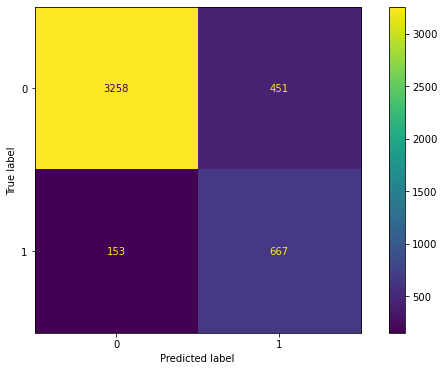

In [109]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

In [110]:
import random
import pylab as pl
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

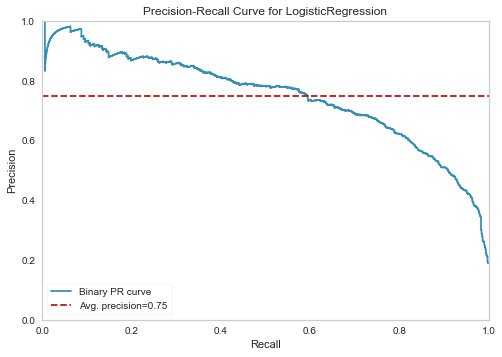

In [111]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    LogisticRegression(C=0.18, max_iter=1000, random_state = 101),
    classes=log.classes_,
    per_class=True,
    cmap="Set1",

)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [112]:
viz.score_

0.7483093335363543

In [113]:
y_pred = log.predict(X_test_count)
log_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
log_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
log_AP = viz.score_

In [114]:
print("viz.score_      : ", viz.score_)
print("log_count_rec : ", log_count_rec)
print("log_count_f1  : ", log_count_f1)
print("log_AP          : ", log_AP)

viz.score_      :  0.7483093335363543
log_count_rec :  [0.87840388 0.81341463]
log_count_f1  :  [0.91516854 0.68833849]
log_AP          :  0.7483093335363543


In [ ]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.naive_bayes import MultinomialNB

# from yellowbrick.datasets import load_occupancy
# from yellowbrick.model_selection import CVScores

# # Load the classification dataset
# X, y = load_occupancy()

# # Create a cross-validation strategy
# cv = StratifiedKFold(n_splits=12, random_state=42)

# # Instantiate the classification model and visualizer
# model = MultinomialNB()
# visualizer = CVScores(model, cv=cv, scoring='f1_weighted')

# visualizer.fit(X, y)        # Fit the data to the visualizer
# visualizer.show()


### TF-IDF

In [115]:
log = LogisticRegression(class_weight="balanced", random_state = 101)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(class_weight='balanced', random_state=101)

LOG MODEL BALANCED
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3709
           1       0.58      0.87      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.90      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     14831
           1       0.64      0.93      0.76      3281

    accuracy                           0.89     18112
   macro avg       0.81      0.91      0.84     18112
weighted avg       0.92      0.89      0.90     18112



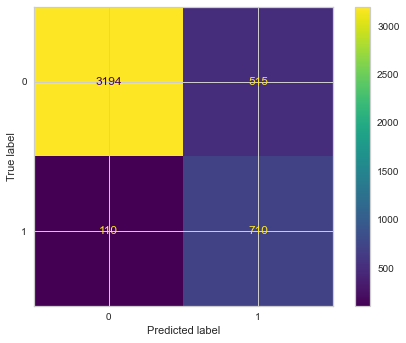

In [116]:
print("LOG MODEL BALANCED")
eval(log, X_train_tf_idf, X_test_tf_idf)

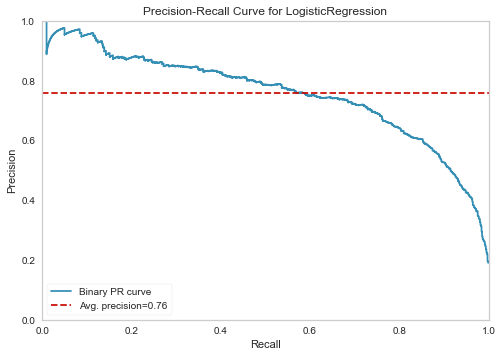

In [117]:
viz = PrecisionRecallCurve(
    LogisticRegression(class_weight= "balanced", random_state = 101),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [118]:
viz.score_

0.7575547748794174

In [119]:
y_pred = log.predict(X_test_tf_idf)
log_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
log_tf_idf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
log_tf_idf_AP = viz.score_

In [120]:
print("viz.score_     : ", viz.score_)
print("log_tf_idf_rec : ", log_tf_idf_rec)
print("log_tf_idf_f1  : ", log_tf_idf_f1)
print("log_tf_idf_AP  : ", log_tf_idf_AP)

viz.score_     :  0.7575547748794174
log_tf_idf_rec :  [0.86114856 0.86585366]
log_tf_idf_f1  :  [0.91087979 0.69437653]
log_tf_idf_AP  :  0.7575547748794174


## Naive Bayes 

### Countvectorizer

***with MultinomialNB***

In [121]:
from sklearn.naive_bayes import MultinomialNB

In [122]:
nb_multi_count = MultinomialNB()
nb_multi_count.fit(X_train_count,y_train)

MultinomialNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3709
           1       0.65      0.77      0.70       820

    accuracy                           0.88      4529
   macro avg       0.80      0.84      0.82      4529
weighted avg       0.89      0.88      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     14831
           1       0.70      0.81      0.75      3281

    accuracy                           0.90     18112
   macro avg       0.83      0.87      0.84     18112
weighted avg       0.91      0.90      0.91     18112



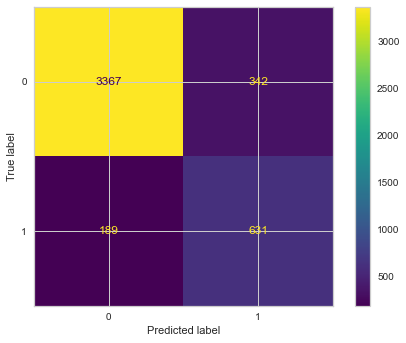

In [123]:
print("NB MODEL")
eval(nb_multi_count, X_train_count, X_test_count)

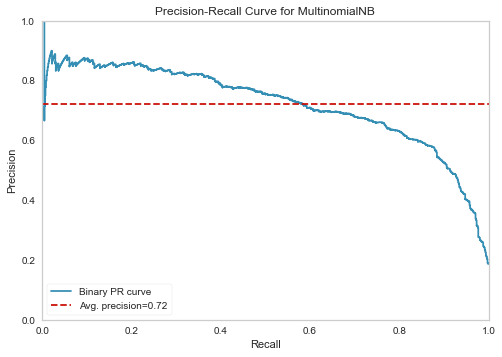

In [124]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(),
    classes=nb_multi_count.classes_,   # label ların isimleri ile gözükmesi için.. aksi halde isim yerine 0,1,2 diye gözükür 
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [125]:
viz.score_

0.7218786471841454

In [126]:
y_pred = nb_multi_count.predict(X_test_count)
nb_multi_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
nb_multi_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
nb_multi_count_AP = viz.score_

In [127]:
print("viz.score_         : ", viz.score_)
print("nb_multi_count_rec : ", nb_multi_count_rec)
print("nb_multi_count_f1  : ", nb_multi_count_f1)
print("nb_multi_count_AP  : ", nb_multi_count_AP)

viz.score_         :  0.7218786471841454
nb_multi_count_rec :  [0.90779186 0.7695122 ]
nb_multi_count_f1  :  [0.92690984 0.7038483 ]
nb_multi_count_AP  :  0.7218786471841454


***with BernoulliNB***

In [217]:
from sklearn.naive_bayes import BernoulliNB

In [218]:
nb_ber_count = BernoulliNB()
nb_ber_count.fit(X_train_count,y_train)

BernoulliNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3709
           1       0.64      0.73      0.68       820

    accuracy                           0.88      4529
   macro avg       0.79      0.82      0.80      4529
weighted avg       0.88      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     14831
           1       0.69      0.79      0.74      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.86      0.84     18112
weighted avg       0.90      0.90      0.90     18112



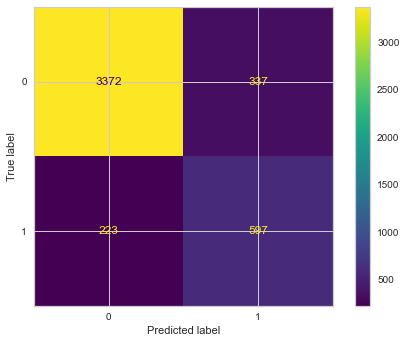

In [219]:
print("NB MODEL")
eval(nb_ber_count, X_train_count, X_test_count)

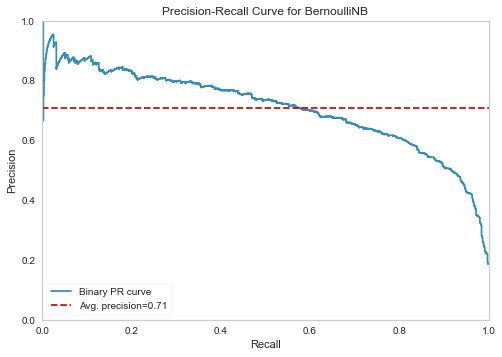

In [220]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    BernoulliNB(),
    classes=nb_ber_count.classes_,   # label ların isimleri ile gözükmesi için.. aksi halde isim yerine 0,1,2 diye gözükür 
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [221]:
viz.score_

0.7081084492502941

In [222]:
y_pred = nb_ber_count.predict(X_test_count)
nb_ber_count_rec = recall_score(y_test, y_pred, labels = [0], average = None)
nb_ber_count_f1 = f1_score(y_test, y_pred, labels = [0], average = None)
nb_ber_count_AP = viz.score_

In [223]:
print("viz.score_       : ", viz.score_)
print("nb_ber_count_rec : ", nb_ber_count_rec)
print("nb_ber_count_f1  : ", nb_ber_count_f1)
print("nb_ber_count_AP  : ", nb_ber_count_AP)

viz.score_       :  0.7081084492502941
nb_ber_count_rec :  [0.90913993]
nb_ber_count_f1  :  [0.92332968]
nb_ber_count_AP  :  0.7081084492502941


### TF-IDF

***with MultinomialNB***

In [128]:
nb_multi_tf_idf = MultinomialNB(alpha=0.01)
nb_multi_tf_idf.fit(X_train_tf_idf,y_train)

MultinomialNB(alpha=0.01)

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.87      0.98      0.93      3709
           1       0.83      0.35      0.49       820

    accuracy                           0.87      4529
   macro avg       0.85      0.67      0.71      4529
weighted avg       0.87      0.87      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     14831
           1       0.92      0.48      0.63      3281

    accuracy                           0.90     18112
   macro avg       0.91      0.73      0.79     18112
weighted avg       0.90      0.90      0.88     18112



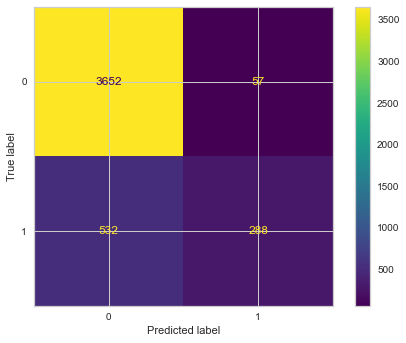

In [129]:
print("NB MODEL")
eval(nb_multi_tf_idf, X_train_tf_idf, X_test_tf_idf)  # tf -idf in kötü sonuç verdiği yer.

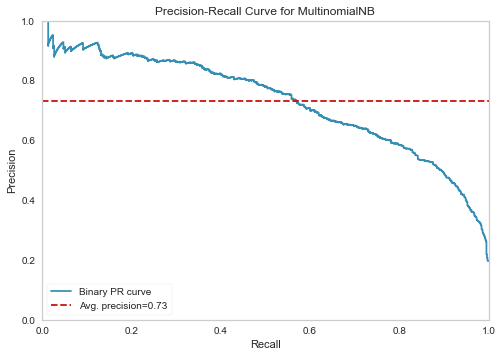

In [130]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(),
    classes=nb_multi_tf_idf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [131]:
viz.score_

0.7305393622908835

In [132]:
y_pred = nb_multi_tf_idf.predict(X_test_tf_idf)
nb_multi_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
nb_multi_tf_idf_f1 = f1_score(y_test, y_pred, y_pred, pos_label = 0, average = None)
nb_multi_tf_idf_AP = viz.score_

In [133]:
print("viz.score_          : ", viz.score_)
print("nb_multi_tf_idf_rec : ", nb_multi_tf_idf_rec)
print("nb_multi_tf_idf_f1  : ", nb_multi_tf_idf_f1)
print("nb_multi_tf_idf_AP  : ", nb_multi_tf_idf_AP)

viz.score_          :  0.7305393622908835
nb_multi_tf_idf_rec :  [0.98463198 0.35121951]
nb_multi_tf_idf_f1  :  [0.4944206  0.92537692 0.92537692 ... 0.92537692 0.92537692 0.92537692]
nb_multi_tf_idf_AP  :  0.7305393622908835


***with BernoulliNB***

In [224]:
nb_ber_tf_idf = BernoulliNB()
nb_ber_tf_idf.fit(X_train_tf_idf,y_train)

BernoulliNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3709
           1       0.64      0.73      0.68       820

    accuracy                           0.88      4529
   macro avg       0.79      0.82      0.80      4529
weighted avg       0.88      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     14831
           1       0.69      0.79      0.74      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.86      0.84     18112
weighted avg       0.90      0.90      0.90     18112



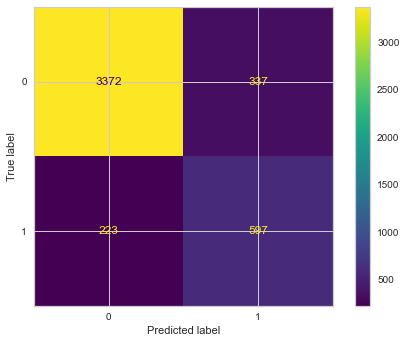

In [225]:
print("NB MODEL")
eval(nb_ber_tf_idf, X_train_tf_idf, X_test_tf_idf)

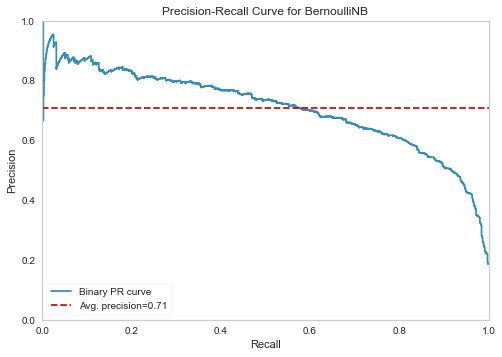

In [226]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    BernoulliNB(),
    classes=nb_ber_tf_idf.classes_,   # label ların isimleri ile gözükmesi için.. aksi halde isim yerine 0,1,2 diye gözükür 
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [227]:
viz.score_

0.7081084492502941

In [228]:
y_pred = nb_ber_tf_idf.predict(X_test_tf_idf)
nb_ber_tf_idf_rec = recall_score(y_test, y_pred, labels = [0], average = None)
nb_ber_tf_idf_f1 = f1_score(y_test, y_pred, labels = [0], average = None)
nb_ber_tf_idf_AP = viz.score_

In [229]:
print("viz.score_        : ", viz.score_)
print("nb_ber_tf_idf_rec : ", nb_multi_tf_idf_rec)
print("nb_ber_tf_idf_f1  : ", nb_multi_tf_idf_f1)
print("nb_ber_tf_idf_AP  : ", nb_multi_tf_idf_AP)

viz.score_        :  0.7081084492502941
nb_ber_tf_idf_rec :  [0.98463198 0.35121951]
nb_ber_tf_idf_f1  :  [0.4944206  0.92537692 0.92537692 ... 0.92537692 0.92537692 0.92537692]
nb_ber_tf_idf_AP  :  0.7305393622908835


## Support Vector Machine (SVM)

### Countvectorizer

In [134]:
from sklearn.svm import LinearSVC
svc_count = LinearSVC(C = .01)  
svc_count.fit(X_train_count,y_train)

LinearSVC(C=0.01)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3709
           1       0.76      0.57      0.66       820

    accuracy                           0.89      4529
   macro avg       0.84      0.77      0.80      4529
weighted avg       0.88      0.89      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     14831
           1       0.84      0.64      0.73      3281

    accuracy                           0.91     18112
   macro avg       0.88      0.80      0.84     18112
weighted avg       0.91      0.91      0.91     18112



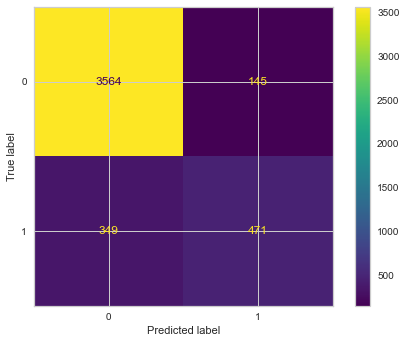

In [135]:
print("SVC MODEL")
eval(svc_count, X_train_count, X_test_count)

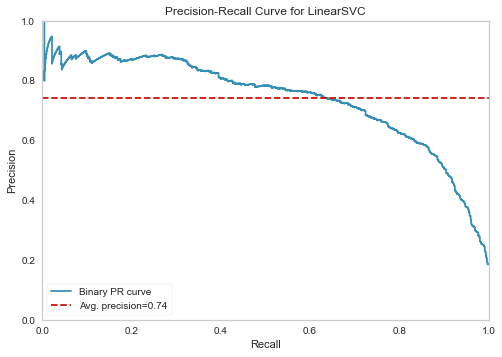

In [136]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01),
    classes=svc_count.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [137]:
viz.score_

0.7405897604197869

In [138]:
y_pred = svc_count.predict(X_test_count)
svc_count_rec = recall_score(y_test, y_pred, labels = [0], average = None)
svc_count_f1 = f1_score(y_test, y_pred, labels = [0], average = None)
svc_count_AP = viz.score_

In [139]:
print("viz.score_    : ", viz.score_)
print("svc_count_rec : ", svc_count_rec)
print("svc_count_f1  : ", svc_count_f1)
print("svc_count_AP  : ", svc_count_AP)

viz.score_    :  0.7405897604197869
svc_count_rec :  [0.9609059]
svc_count_f1  :  [0.93518761]
svc_count_AP  :  0.7405897604197869


### TD-IDF

In [140]:
svc_tf_idf = LinearSVC(C = 1)  
svc_tf_idf.fit(X_train_tf_idf,y_train)

LinearSVC(C=1)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      3709
           1       0.72      0.62      0.67       820

    accuracy                           0.89      4529
   macro avg       0.82      0.78      0.80      4529
weighted avg       0.88      0.89      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14831
           1       0.90      0.80      0.84      3281

    accuracy                           0.95     18112
   macro avg       0.93      0.89      0.91     18112
weighted avg       0.95      0.95      0.95     18112



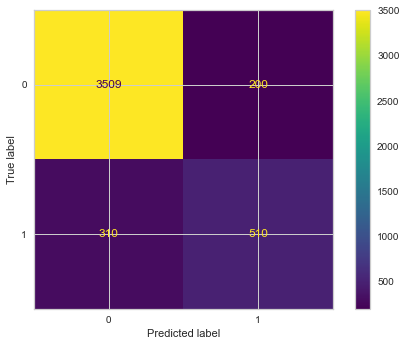

In [141]:
print("SVC MODEL")
eval(svc_tf_idf, X_train_tf_idf, X_test_tf_idf)

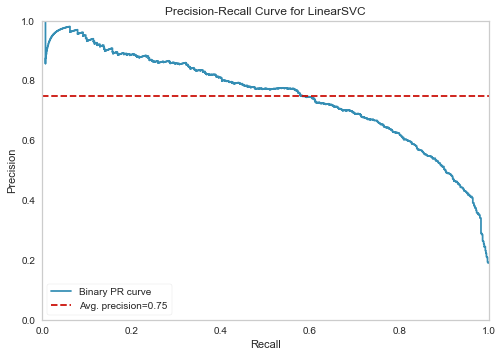

In [142]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01),
    classes=svc_tf_idf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [143]:
viz.score_

0.7470979290868939

In [231]:
y_pred = svc_tf_idf.predict(X_test_tf_idf)
svc_tf_idf_rec = recall_score(y_test, y_pred, labels = [0], average = None)
svc_tf_idf_f1 = f1_score(y_test, y_pred, labels = [0], average = None)
svc_tf_idf_AP = viz.score_

In [232]:
print("viz.score_      : ", viz.score_)
print("svc_tf_idf_re   : ", svc_tf_idf_rec_)
print("svc_tf_idf_f1   : ", svc_tf_idf_f1_)
print("svc_tf_idf_AP   : ", svc_tf_idf_AP_)

viz.score_      :  0.7081084492502941
svc_tf_idf_re   :  [0.94607711]
svc_tf_idf_f1   :  [0.93225292]
svc_tf_idf_AP   :  0.7470979290868939


## Random Forest

### Countvectorizer

In [146]:
from sklearn.ensemble import RandomForestClassifier
rf_count = RandomForestClassifier(100, max_depth = 10, random_state = 101, n_jobs = -1, class_weight="balanced") # class_weight="balanced"
rf_count.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=101)

RF MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      3709
           1       0.53      0.81      0.64       820

    accuracy                           0.83      4529
   macro avg       0.74      0.82      0.77      4529
weighted avg       0.87      0.83      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     14831
           1       0.58      0.87      0.70      3281

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



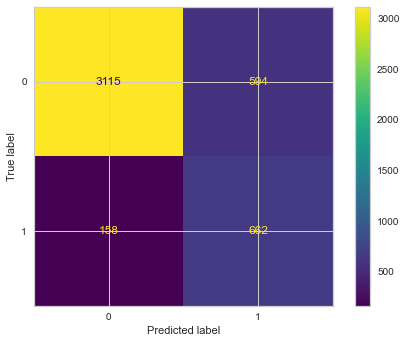

In [147]:
print("RF MODEL")
eval(rf_count, X_train_count, X_test_count)

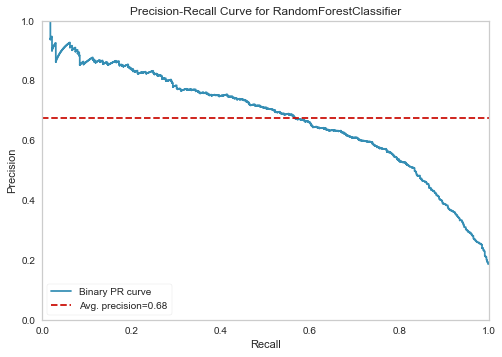

In [148]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 10, random_state = 101, n_jobs = -1, class_weight="balanced"),
    classes=rf_count.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [149]:
viz.score_

0.6760332390380851

In [150]:
y_pred = rf_count.predict(X_test_count)
rf_count_rec = recall_score(y_test, y_pred, labels = [0], average = None)
rf_count_f1 = f1_score(y_test, y_pred, labels = [0], average = None)
rf_count_AP = viz.score_

In [151]:
print("viz.score_   : ", viz.score_)
print("rf_count_rec : ", rf_count_rec)
print("rf_count_f1  : ", rf_count_f1)
print("rf_count_AP  : ", rf_count_AP)

viz.score_   :  0.6760332390380851
rf_count_rec :  [0.83984902]
rf_count_f1  :  [0.89229447]
rf_count_AP  :  0.6760332390380851


### TF-IDF

In [152]:
rf_tf_idf = RandomForestClassifier(100, max_depth = 10, random_state = 101, n_jobs = -1, class_weight="balanced") # class_weight="balanced"
rf_tf_idf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=101)

RF MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      3709
           1       0.51      0.79      0.62       820

    accuracy                           0.83      4529
   macro avg       0.73      0.81      0.75      4529
weighted avg       0.87      0.83      0.84      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     14831
           1       0.58      0.89      0.70      3281

    accuracy                           0.86     18112
   macro avg       0.78      0.87      0.81     18112
weighted avg       0.90      0.86      0.87     18112



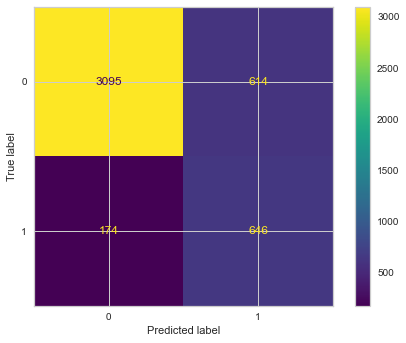

In [153]:
print("RF MODEL")
eval(rf_tf_idf, X_train_tf_idf, X_test_tf_idf)

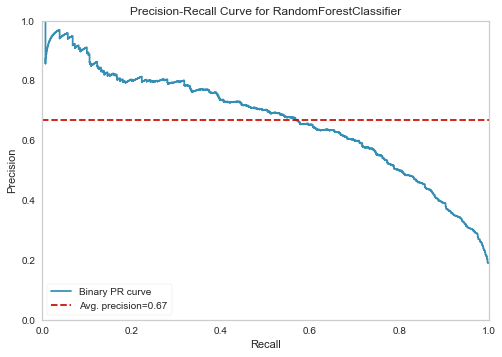

In [154]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 10, random_state = 101, n_jobs = -1, class_weight="balanced"),
    classes=rf_tf_idf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [155]:
viz.score_

0.6678637250794185

In [156]:
y_pred = rf_tf_idf.predict(X_test_tf_idf)
rf_tf_idf_rec = recall_score(y_test, y_pred, labels = [0], average = None)
rf_tf_idf_f1 = f1_score(y_test, y_pred, labels = [0], average = None)
rf_tf_idf_AP = viz.score_

In [157]:
print("viz.score_    : ", viz.score_)
print("rf_tf_idf_rec : ", rf_tf_idf_rec)
print("rf_tf_idf_f1  : ", rf_tf_idf_f1)
print("rf_tf_idf_AP  : ", rf_tf_idf_AP)

viz.score_    :  0.6678637250794185
rf_tf_idf_rec :  [0.83445673]
rf_tf_idf_f1  :  [0.88707366]
rf_tf_idf_AP  :  0.6678637250794185


## Ada Boosting

### Countvectorizer

In [158]:
from sklearn.ensemble import AdaBoostClassifier

ada_count = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada_count.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3709
           1       0.69      0.58      0.63       820

    accuracy                           0.88      4529
   macro avg       0.80      0.76      0.78      4529
weighted avg       0.87      0.88      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     14831
           1       0.80      0.66      0.72      3281

    accuracy                           0.91     18112
   macro avg       0.86      0.81      0.83     18112
weighted avg       0.90      0.91      0.90     18112



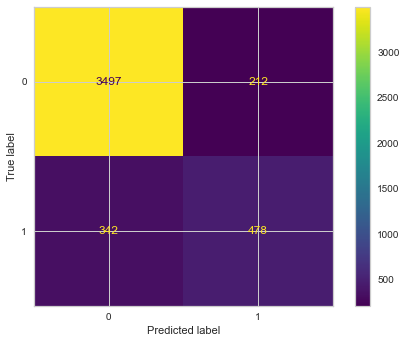

In [159]:
print("Ada MODEL")
eval(ada_count, X_train_count, X_test_count)

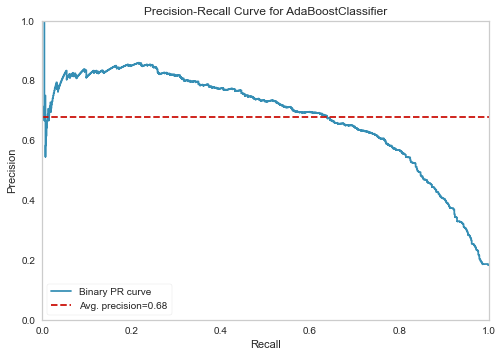

In [160]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada_count.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [161]:
viz.score_

0.679278253579584

In [162]:
y_pred = ada_count.predict(X_test_count)
ada_count_rec = recall_score(y_test, y_pred, labels = [0], average = None)
ada_count_f1 = f1_score(y_test, y_pred, labels = [0], average = None)
ada_count_AP = viz.score_

In [163]:
print("viz.score_    : ", viz.score_)
print("ada_count_rec : ", ada_count_rec)
print("ada_count_f1  : ", ada_count_f1)
print("ada_count_AP  : ", ada_count_AP)

viz.score_    :  0.679278253579584
ada_count_rec :  [0.94284174]
ada_count_f1  :  [0.92660307]
ada_count_AP  :  0.679278253579584


### TF-IDF

In [164]:
ada_tf_idf = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada_tf_idf.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3709
           1       0.67      0.56      0.61       820

    accuracy                           0.87      4529
   macro avg       0.79      0.75      0.77      4529
weighted avg       0.86      0.87      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     14831
           1       0.82      0.71      0.76      3281

    accuracy                           0.92     18112
   macro avg       0.88      0.84      0.86     18112
weighted avg       0.92      0.92      0.92     18112



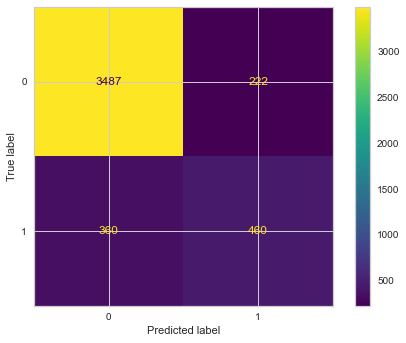

In [165]:
print("Ada MODEL")
eval(ada_tf_idf, X_train_tf_idf, X_test_tf_idf)

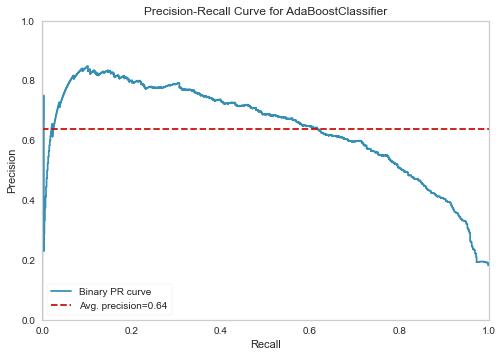

In [166]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada_tf_idf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [167]:
viz.score_

0.6396855970775207

In [168]:
y_pred = ada_tf_idf.predict(X_test_tf_idf)
ada_tf_idf_rec = recall_score(y_test, y_pred, labels = [0], average = None)
ada_tf_idf_f1 = f1_score(y_test, y_pred, labels = [0], average = None)
ada_tf_idf_AP = viz.score_

In [169]:
print("viz.score_     : ", viz.score_)
print("ada_tf_idf_rec : ", ada_tf_idf_rec)
print("ada_tf_idf_f1  : ", ada_tf_idf_f1)
print("ada_tf_idf_AP  : ", ada_tf_idf_AP)

viz.score_     :  0.6396855970775207
ada_tf_idf_rec :  [0.94014559]
ada_tf_idf_f1  :  [0.92297512]
ada_tf_idf_AP  :  0.6396855970775207


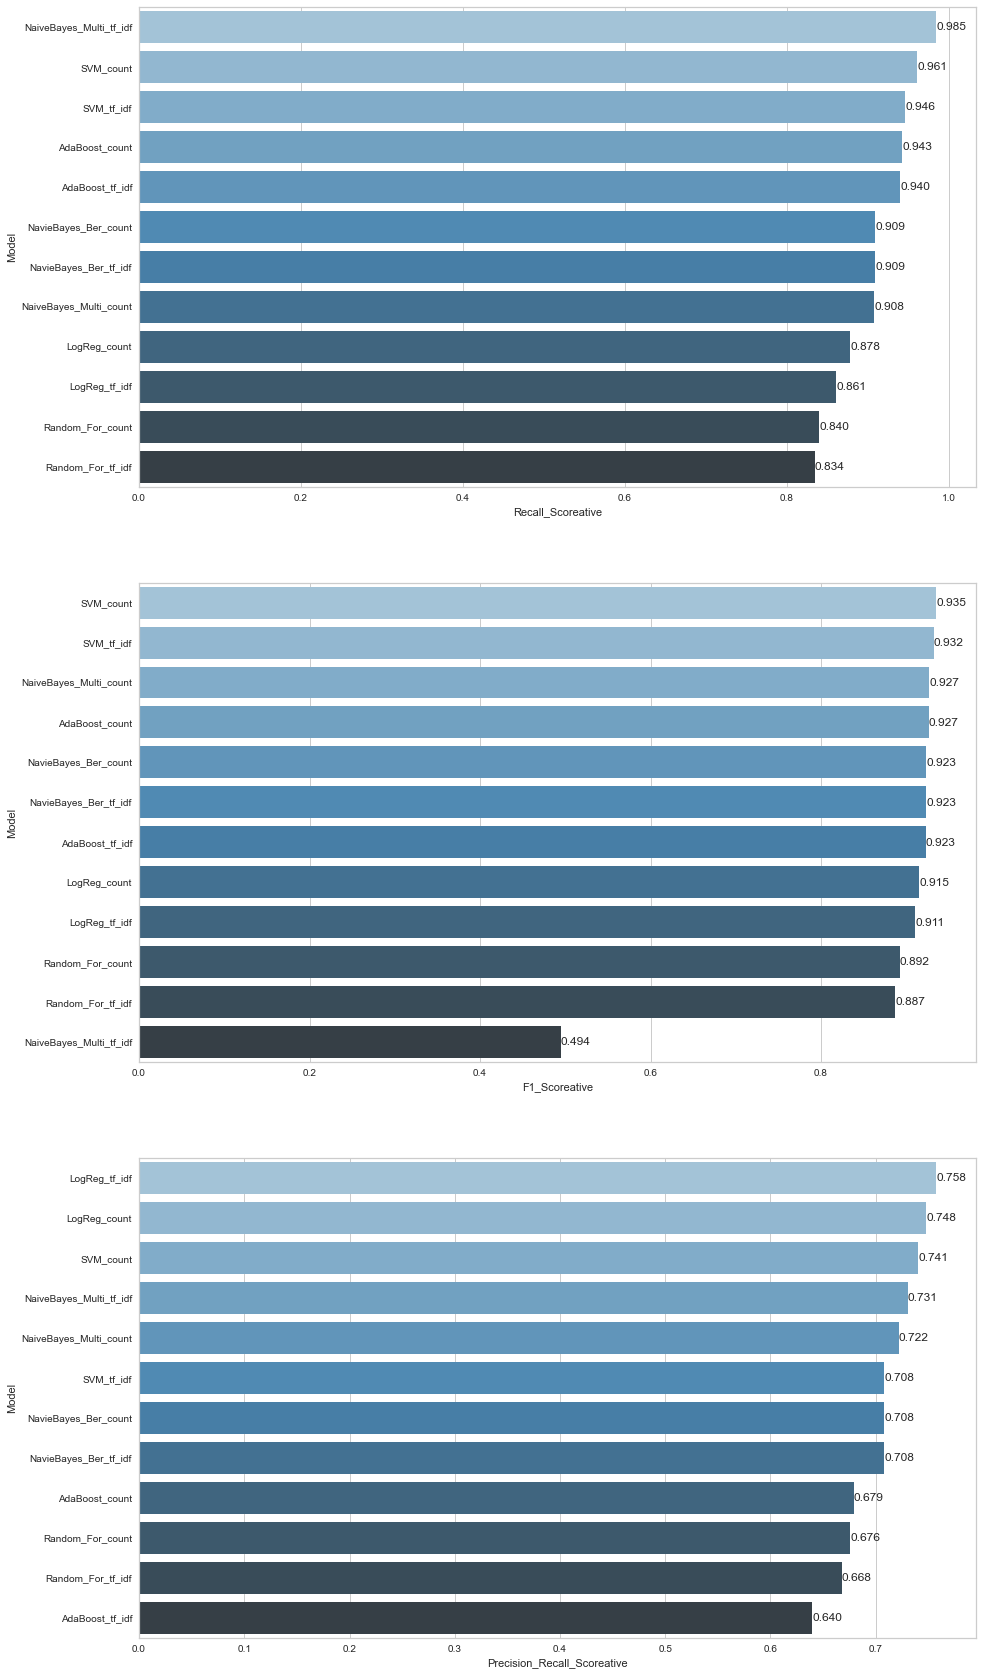

In [233]:
compare = pd.DataFrame({"Model": ["LogReg_count", "LogReg_tf_idf", "NaiveBayes_Multi_count", "NaiveBayes_Multi_tf_idf",
                                  "NavieBayes_Ber_count", "NavieBayes_Ber_tf_idf","SVM_count", "SVM_tf_idf", 
                                  "Random_For_count", "Random_For_tf_idf", "AdaBoost_count", "AdaBoost_tf_idf",
                                  ],
                        
                        "F1_Scoreative": [log_count_f1[0], log_tf_idf_f1[0], nb_multi_count_f1[0], nb_multi_tf_idf_f1[0],
                                             nb_ber_count_f1[0], nb_ber_tf_idf_f1[0], svc_count_f1[0], svc_tf_idf_f1[0],
                                             rf_count_f1[0], rf_tf_idf_f1[0], ada_count_f1[0], ada_tf_idf_f1[0]],
                        
                        "Recall_Scoreative": [log_count_rec[0], log_tf_idf_rec[0], nb_multi_count_rec[0], nb_multi_tf_idf_rec[0], 
                                                  nb_ber_count_rec[0], nb_ber_tf_idf_rec[0], svc_count_rec[0], svc_tf_idf_rec[0], 
                                                  rf_count_rec[0], rf_tf_idf_rec[0], ada_count_rec[0], ada_tf_idf_rec[0]],
                        
                        "Precision_Recall_Scoreative": [log_AP, log_tf_idf_AP, nb_multi_count_AP, nb_multi_tf_idf_AP, 
                                                            nb_ber_count_AP, nb_ber_tf_idf_AP, svc_count_AP, svc_tf_idf_AP, 
                                                            rf_count_AP, rf_tf_idf_AP, ada_count_AP, ada_tf_idf_AP]})

def labels(ax):
                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Scoreative", ascending=False)
ax=sns.barplot(x="Recall_Scoreative", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Scoreative", ascending=False)
ax=sns.barplot(x="F1_Scoreative", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Precision_Recall_Scoreative", ascending=False)
ax=sns.barplot(x="Precision_Recall_Scoreative", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();

## DL modeling

In [171]:
df_dl = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df_dl.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                                                                                                                                                                               Review Text  \
0                                                                                                                                                    Absolutely wonderful - silky and sexy and comfortable   
1  Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length...   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...   
3                                                                             I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4         This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   Rating  Recommended IND  Positive Feedback Count   Division Name  \
0       4                1                        0       Initmates   
1       5                1                        4         General   
2       3                0                        0         General   
3       5                1                        0  General Petite   
4       5                1                        6         General   

  Department Name Class Name  
0        Intimate  Intimates  
1         Dresses    Dresses  
2         Dresses    Dresses  
3         Bottoms      Pants  
4            Tops    Blouses

In [172]:
df_dl = df_dl[["Review Text","Recommended IND"]]
df_dl.head()

Review Text  \
0                                                                                                                                                    Absolutely wonderful - silky and sexy and comfortable   
1  Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length...   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...   
3                                                                             I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4         This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   Recommended IND  
0                1  
1                1  
2                0  
3                1  
4                1

In [173]:
df_dl.rename(columns = {'Review Text':'text', 'Recommended IND':'recommend'}, inplace = True)

In [174]:
df_dl.shape

(23486, 2)

In [175]:
df_dl.isnull().sum()

text         845
recommend      0
dtype: int64

In [176]:
df_dl = df_dl.dropna(subset=['text'], axis=0)
df_dl = df_dl.reset_index(drop=True)

In [177]:
df_dl.isnull().sum()

text         0
recommend    0
dtype: int64

In [178]:
df_dl.shape

(22641, 2)

In [179]:
df_dl.head()

text  \
0                                                                                                                                                    Absolutely wonderful - silky and sexy and comfortable   
1  Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length...   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...   
3                                                                             I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4         This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   recommend  
0          1  
1          1  
2          0  
3          1  
4          1

In [180]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Tokenization

In [235]:
X = df_dl['text'].values
y = df_dl['recommend'].map({0:1, 1:0}).values

In [236]:
num_words = 10000
tokenizer = Tokenizer(num_words=num_words)

In [237]:
tokenizer.fit_on_texts(X)

### Creating word index

In [238]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [239]:
len(tokenizer.word_index)

14847

In [240]:
len(tokenizer.word_index.keys())

14847

### Converting tokens to numeric

In [241]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [242]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [243]:
X_num_tokens

[[253, 532, 917, 3, 662, 3, 68],
 [21,
  7,
  18,
  33,
  1713,
  99,
  2,
  1322,
  8,
  221,
  5,
  9,
  4,
  106,
  3,
  36,
  314,
  2,
  131,
  1243,
  2,
  429,
  41,
  24,
  52,
  5,
  136,
  1243,
  33,
  95,
  2,
  72,
  4,
  95,
  3,
  38,
  501,
  2,
  21,
  1,
  86,
  11,
  31,
  416,
  39,
  4,
  53,
  454,
  1,
  392,
  41,
  155,
  29,
  4,
  130,
  1372,
  11,
  438,
  439,
  6,
  772,
  95],
 [2,
  65,
  312,
  178,
  1095,
  12,
  7,
  18,
  3,
  51,
  195,
  5,
  8,
  102,
  12,
  31,
  2,
  1152,
  52,
  1,
  95,
  46,
  17,
  236,
  22,
  10,
  2,
  219,
  7,
  8,
  29,
  6689,
  46,
  16,
  46,
  9,
  661,
  20,
  2,
  118,
  19,
  784,
  5,
  43,
  2,
  2147,
  5,
  9,
  95,
  97,
  82,
  15,
  39,
  637,
  250,
  1,
  25,
  656,
  15,
  68,
  3,
  26,
  258,
  10,
  1,
  175,
  656,
  65,
  4,
  23,
  148,
  272,
  475,
  3,
  527,
  718,
  489,
  4601,
  151,
  975,
  1876,
  4,
  1877,
  142,
  1589,
  15,
  1,
  4601,
  151,
  475,
  830,
  3247,
  313,
  1,


### Maximum number of tokens for all documents¶

In [244]:
num_tokens.max()

116

In [245]:
num_tokens.mean()

60.39287133960514

In [246]:
num_tokens.argmax()

16263

In [247]:
X[16263]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [248]:
num_tokens.argmin()

820

In [249]:
X[820]

'Great style!'

### Fixing token counts of all documents (pad_sequences)

In [250]:
max_tokens = 103

In [251]:
sum(num_tokens < max_tokens) / len(num_tokens)

0.9604699439070712

In [252]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [253]:
X_pad.shape

(22641, 103)

### Train Set Split

In [261]:
from sklearn.model_selection import train_test_split
from keras.layers import Bidirectional

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=101)

### Modeling

In [263]:
model = Sequential()

In [264]:
embedding_size = 100

In [265]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))

In [266]:
model.add(Bidirectional(GRU(units=48, return_sequences=True)))
model.add(Bidirectional(GRU(units=24, return_sequences=True)))
model.add(Bidirectional(GRU(units=12)))
model.add(Dense(1, activation='sigmoid'))

In [267]:
optimizer = Adam(lr=0.004)

In [268]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [269]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 103, 100)          1000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 103, 96)           43200     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 103, 48)           17568     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 24)                4464      
_________________________________________________________________
dense (Dense)                (None, 1)                 25        
Total params: 1,065,257
Trainable params: 1,065,257
Non-trainable params: 0
_________________________________________________________________


In [270]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto", 
                           verbose=1, patience = 5, restore_best_weights=True)

In [271]:
pd.Series(y_train).value_counts(normalize=True) 

0   0.819
1   0.181
dtype: float64

In [272]:
weights = {0:19, 1:81}

In [273]:
model.fit(X_train, y_train, epochs=25, batch_size=256, class_weight=weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
71/71 [==============================] - 122s 2s/step - loss: 14.8757 - recall: 0.7562 - val_loss: 0.3656 - val_recall: 0.8049
Epoch 2/25
71/71 [==============================] - 82s 1s/step - loss: 9.0433 - recall: 0.9046 - val_loss: 0.3401 - val_recall: 0.8232
Epoch 3/25
71/71 [==============================] - 71s 994ms/step - loss: 6.1071 - recall: 0.9509 - val_loss: 0.3962 - val_recall: 0.8280
Epoch 4/25
71/71 [==============================] - 75s 1s/step - loss: 4.8681 - recall: 0.9646 - val_loss: 0.3474 - val_recall: 0.6927
Epoch 5/25
71/71 [==============================] - 70s 982ms/step - loss: 4.3881 - recall: 0.9674 - val_loss: 0.4655 - val_recall: 0.7988
Epoch 6/25
71/71 [==============================] - 72s 1s/step - loss: 3.5359 - recall: 0.9765 - val_loss: 0.3903 - val_recall: 0.7012
Epoch 7/25
71/71 [==============================] - 66s 935ms/step - loss: 2.9143 - recall: 0.9823 - val_loss: 0.4227 - val_recall: 0.6793
Restoring model weights from the end 

### Model evaluation

In [274]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

loss  recall  val_loss  val_recall
0 14.876   0.756     0.366       0.805
1  9.043   0.905     0.340       0.823
2  6.107   0.951     0.396       0.828
3  4.868   0.965     0.347       0.693
4  4.388   0.967     0.466       0.799

<AxesSubplot:>

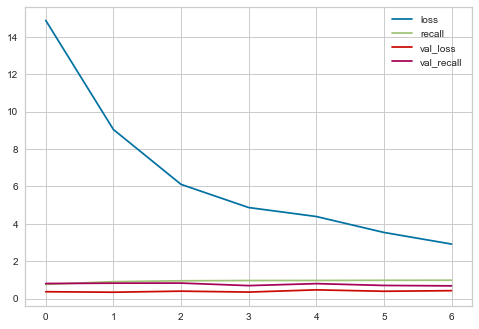

In [275]:
model_loss.plot()

In [276]:
model.evaluate(X_train, y_train)

566/566 [==============================] - 29s 48ms/step - loss: 0.2265 - recall: 0.9637


[0.22654511034488678, 0.9637305736541748]

In [277]:
model.evaluate(X_test, y_test) 

142/142 [==============================] - 9s 63ms/step - loss: 0.3401 - recall: 0.8232


[0.3401415944099426, 0.8231707215309143]

In [278]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")  # ture olanlar (0.5 ten büyük olanları) 1 e, false ları (0.5 ten küçükleri) 0 çevir.

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

[[13476  1355]
 [  119  3162]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     14831
           1       0.70      0.96      0.81      3281

    accuracy                           0.92     18112
   macro avg       0.85      0.94      0.88     18112
weighted avg       0.94      0.92      0.92     18112



In [279]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[3227  482]
 [ 145  675]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3709
           1       0.58      0.82      0.68       820

    accuracy                           0.86      4529
   macro avg       0.77      0.85      0.80      4529
weighted avg       0.89      0.86      0.87      4529



In [280]:
from sklearn.metrics import precision_recall_curve, average_precision_score

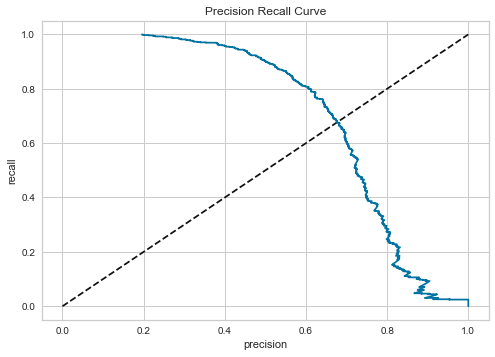

In [281]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [286]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

In [287]:
print("DL_AP   : ", DL_AP)
print("DL_f1   : ", DL_f1)
print("DL_rec  : ", DL_rec)

DL_AP   :  0.7081006939024911
DL_f1   :  0.6828528072837632
DL_rec  :  0.823170731707317


### Compare Models F1 Scores, Recall Scores and Average Precision Score

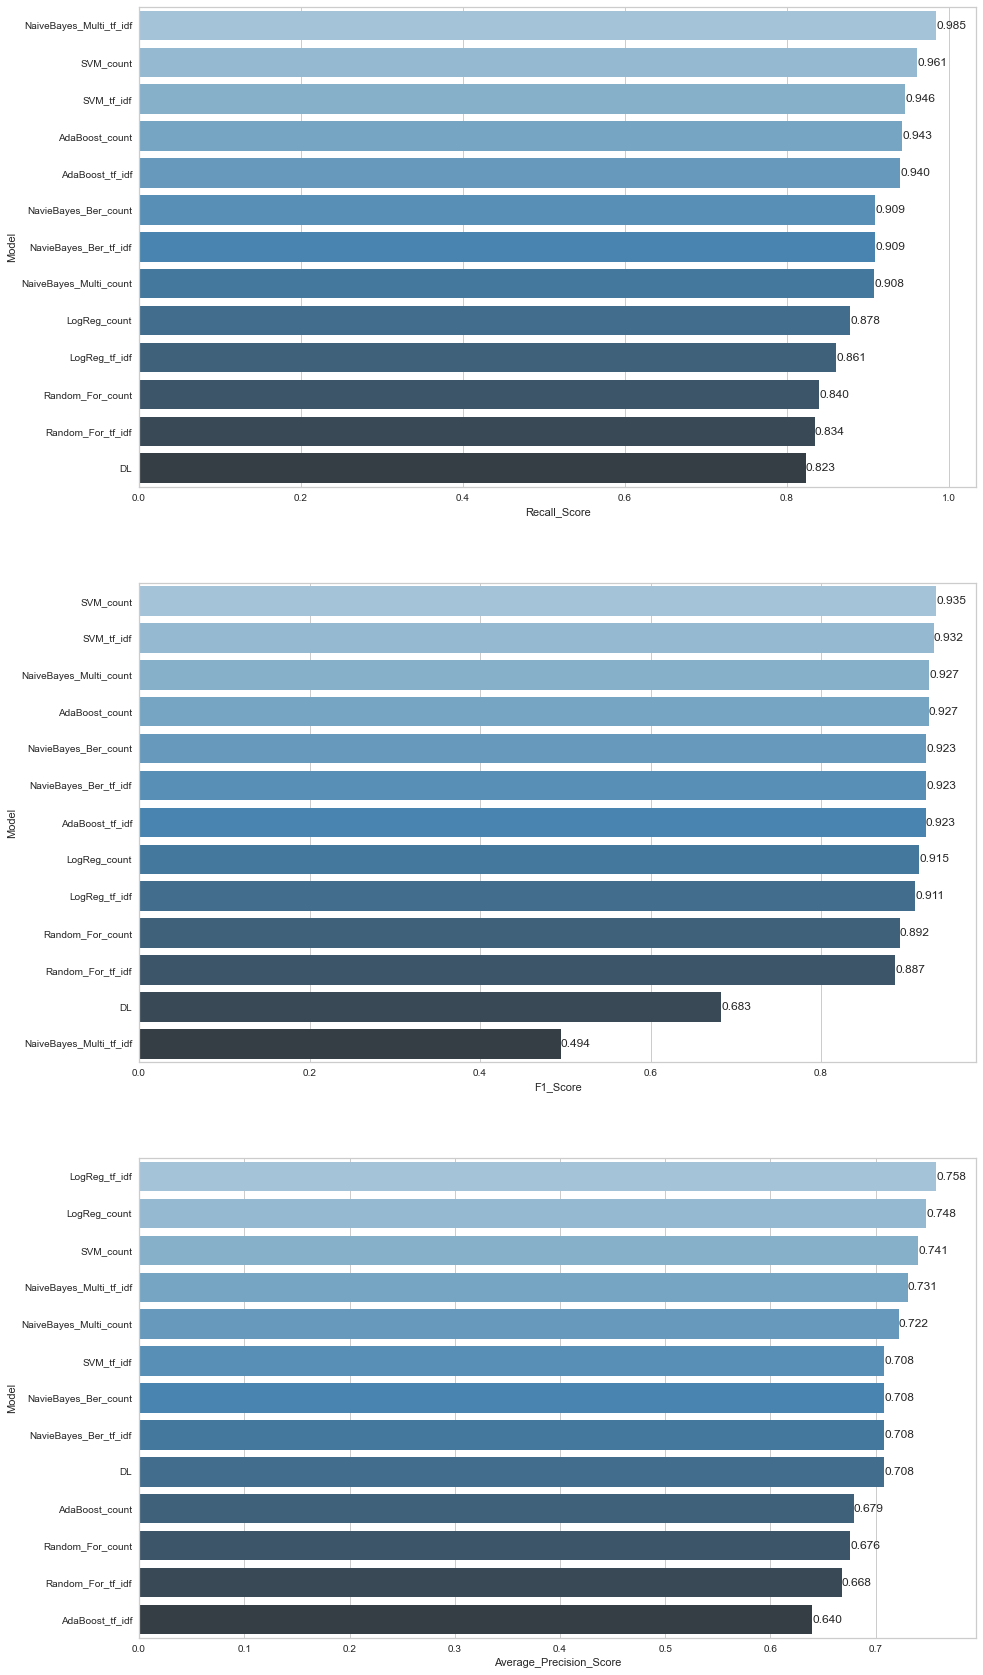

In [291]:
compare = pd.DataFrame({"Model": ["LogReg_count", "LogReg_tf_idf", "NaiveBayes_Multi_count", "NaiveBayes_Multi_tf_idf",
                                  "NavieBayes_Ber_count", "NavieBayes_Ber_tf_idf","SVM_count", "SVM_tf_idf", 
                                  "Random_For_count", "Random_For_tf_idf", "AdaBoost_count", "AdaBoost_tf_idf", "DL"
                                  ],
                        
                        "F1_Score": [log_count_f1[0], log_tf_idf_f1[0], nb_multi_count_f1[0], nb_multi_tf_idf_f1[0],
                                    nb_ber_count_f1[0], nb_ber_tf_idf_f1[0], svc_count_f1[0], svc_tf_idf_f1[0],
                                    rf_count_f1[0], rf_tf_idf_f1[0], ada_count_f1[0], ada_tf_idf_f1[0], DL_f1],
                        
                        "Recall_Score": [log_count_rec[0], log_tf_idf_rec[0], nb_multi_count_rec[0], nb_multi_tf_idf_rec[0], 
                                    nb_ber_count_rec[0], nb_ber_tf_idf_rec[0], svc_count_rec[0], svc_tf_idf_rec[0], 
                                    rf_count_rec[0], rf_tf_idf_rec[0], ada_count_rec[0], ada_tf_idf_rec[0], DL_rec],
                        
                        "Average_Precision_Score":  [log_AP, log_tf_idf_AP, nb_multi_count_AP, nb_multi_tf_idf_AP, 
                                    nb_ber_count_AP, nb_ber_tf_idf_AP, svc_count_AP, svc_tf_idf_AP, 
                                    rf_count_AP, rf_tf_idf_AP, ada_count_AP, ada_tf_idf_AP, DL_AP]})

def labels(ax):
                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___